In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns;
import random

In [2]:
name = []
for i in range(0,39):
    name.append(i)
data = pd.read_table("TS_parameters.dat",names = name)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
1,3,92.226843,64.103448,33.238444,60.431682,0.353730,0.592057,0.361437,0.233254,4.590943,...,0.026879,4.920429,5.0,86.028476,3.845966,5.0,17.118309,1.522457,2.0,67.549634
2,4,41.653071,78.848110,88.903325,86.844385,0.568970,0.210528,0.501165,0.993139,2.349084,...,0.043676,2.966159,1.0,42.974778,2.402528,4.0,34.094213,10.456345,6.0,79.551000
3,3,90.797363,97.009746,14.640918,90.042360,0.459911,0.810461,0.293492,0.339315,4.123649,...,0.010986,5.107971,6.0,11.462402,4.703531,5.0,63.406978,15.296861,2.0,92.220893
4,2,68.830603,74.907142,90.383648,99.582754,0.833520,0.264843,0.249321,0.971902,1.260727,...,0.021517,5.683656,3.0,77.638190,3.914257,3.0,33.352850,14.245862,5.0,98.548766
5,1,41.430798,75.419256,88.653746,3.850175,0.144067,0.118836,0.223660,0.505535,0.237437,...,0.016774,2.341902,1.0,79.720376,1.119606,2.0,74.099141,19.758831,6.0,60.084156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,4,73.600859,15.389422,59.285581,21.327445,0.391159,0.526196,0.593798,0.576113,1.315099,...,0.010794,0.466162,4.0,31.289595,5.439231,3.0,12.357643,8.700401,4.0,52.677582
997,2,33.519240,7.988231,12.678894,60.014711,0.694431,0.845576,0.869650,0.705941,3.554974,...,0.022953,0.084012,4.0,48.018228,3.407128,2.0,71.673398,9.105396,5.0,47.457449
998,2,57.220799,38.716091,69.625206,16.922766,0.993977,0.859367,0.457100,0.631309,1.590341,...,0.039520,5.462422,3.0,30.921451,5.638453,2.0,39.377722,14.540589,2.0,23.288278
999,3,28.169191,50.484621,31.118336,38.960310,0.736237,0.944257,0.117562,0.239429,3.052712,...,0.011528,3.816046,1.0,67.170713,5.757969,4.0,94.137809,23.989589,3.0,20.148470


In [129]:
def hill(X,X0,l,n):
    
    Hplus = (X**n)/(X**n + X0**n)
    Hminus = (X0**n)/(X**n + X0**n)
    
    H = l*Hplus + Hminus
    
    return H


In [130]:
def par(x):
    parm = data.iloc[x].to_numpy()
    return parm

parm = par(999)

def f(s,t):
    
    h4 = s[0]
    h1 = s[1]
    pp = s[2]
    sr = s[3]
    
    gh1 = parm[1]
    gh4 = parm[2]
    gpp = parm[3]
    gsr = parm[4]
    dgh1 = parm[5]
    dgh4 = parm[6]
    dgpp = parm[7]
    dgsr = parm[8]

    trdh4toh1 = parm[9]
    nh4toh1 = parm[10]
    lh4toh1 = parm[11]

    trdh1toh1 = parm[12]
    nh1toh1 = parm[13]
    lh1toh1 = parm[14]

    trdh1toh4 = parm[15]
    nh1toh4 = parm[16]
    lh1toh4 = parm[17]

    trdsrtoh4 = parm[18]
    nsrtoh4 = parm[19]
    lsrtoh4 = parm[20]

    trdh4toh4 = parm[21]
    nh4toh4 = parm[22]
    lh4toh4 = parm[23]

    trdsrtopp = parm[24]
    nsrtopp = parm[25]
    lsrtopp = parm[26]

    trdh1topp = parm[27]
    nh1topp = parm[28]
    lh1topp = parm[29]

    trdpptopp = parm[30]
    npptopp = parm[31]
    lpptopp = parm[32]

    trdpptosr = parm[33]
    npptosr = parm[34]
    lpptosr = parm[35]

    trdsrtosr = parm[36]
    nsrtosr = parm[37]
    lsrtosr = parm[38]
    
    Hh4toh1 = hill(h4,trdh4toh1,lh4toh1,nh4toh1)
    Hh1toh1 = hill(h1,trdh1toh1,lh1toh1,nh1toh1)
    Hh1toh4 = hill(h1,trdh1toh4,lh1toh4,nh1toh4)
    Hh4toh4 = hill(h4,trdh4toh4,lh4toh4,nh4toh4)

    Hsrtopp = hill(sr,trdsrtopp,lsrtopp,nsrtopp)
    Hpptosr = hill(pp,trdpptosr,lpptosr,npptosr)
    Hpptopp = hill(pp,trdpptopp,lpptopp,npptopp)
    Hsrtosr = hill(sr,trdsrtosr,lsrtosr,nsrtosr)

    Hsrtoh4 = hill(sr,trdsrtoh4,lsrtoh4,nsrtoh4)
    Hh1topp = hill(h1,trdh1topp,lh1topp,nh1topp)

    #Equations

    dh1dt = gh1*Hh1toh1*Hh4toh1 - dgh1*h1
    dh4dt = gh4*Hh1toh4*Hh4toh4*Hsrtoh4 - dgh4*h4
    dsrdt = gsr*Hsrtosr*Hpptosr - dgsr*sr
    dppdt = gpp*Hsrtopp*Hpptopp*Hh1topp - dgpp*pp
    
    return [dh4dt,dh1dt,dppdt,dsrdt]

parm

array([4.0000000e+00, 5.2184976e+01, 7.3799002e+01, 3.8793882e+01,
       2.6523368e+01, 7.9973600e-01, 5.0846200e-01, 6.0079000e-01,
       6.7210900e-01, 3.4749250e+00, 5.0000000e+00, 5.3291302e+01,
       2.3944300e+01, 6.0000000e+00, 9.4170900e+00, 2.4447515e+01,
       6.0000000e+00, 3.8070606e+01, 1.9082359e+01, 2.0000000e+00,
       1.0892000e-02, 5.9949860e+00, 1.0000000e+00, 7.8501753e+01,
       1.2787528e+01, 6.0000000e+00, 1.2113989e+01, 1.3971928e+01,
       1.0000000e+00, 1.3018000e-02, 2.2048610e+00, 3.0000000e+00,
       3.4032646e+01, 3.0648280e+00, 1.0000000e+00, 1.4225206e+01,
       1.8353860e+01, 5.0000000e+00, 5.7246997e+01])

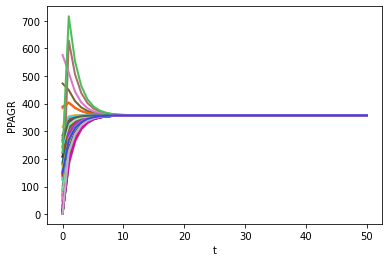

No. of Stable States = 4.0 


In [132]:
t = np.linspace(0,50)
for i in range(1,100):
    s0 = [2**(10*random.random()),2**(10*random.random()),2**(10*random.random()),2**(10*random.random())]
    s = odeint(f,s0,t)
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    plt.plot(t,s[:,2],c=color, linewidth=2.0)


plt.xlabel("t")
plt.ylabel("PPAGR")
plt.show()
print("No. of Stable States = {} ".format(parm[0]))